Dataset with students data extracted from Unir archive.  

# Libraries and datasets loading

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb 

# Default plot size is set.
plt.rcParams['figure.figsize'] = [15, 15]

# Dataset is loaded.
df_uni = pd.read_csv('dataset.csv')

# 1.- Numerical data statistics and analysis

In [24]:
df_uni.describe()

,NUMERO,ESTRATO,EDAD,INGRESO_FAMILIAR,BIOLOGIA,CIENCIAS_NATURALES,LECTURA_CRITICA,LENGUA_Y_LITERATURA,LENGUAJE,APTITUD_VERBAL,...,ELECTIVA,COMP_FLEXIBLE,IDIOMA_EXT,QUIMICA,FISICA,MATEMATICAS,RAZ_CUANTITATIVO,APTITUD_MATEMATICA,CONOCIM_MATEMATICOS,ULT_SEMESTRE_CURSADO
count,23921.000000,23921.000000,23921.000000,2.392000e+04,15565.00000,8332.000000,8246.000000,86.000000,14551.000000,1010.000000,...,1014.000000,7422.000000,20971.000000,15563.000000,15520.000000,22883.000000,3836.000000,1011.000000,1011.000000,19670.000000
mean,11961.000000,1.926174,26.885833,7.220237e+06,48.20794,57.952164,56.604863,81.450465,50.125330,49.288653,...,51.870316,29.764974,48.680479,47.766240,47.298575,52.214742,57.553441,49.056657,50.013630,5.116878
std,6905.542231,0.985591,6.731053,1.305490e+08,8.45238,17.199021,7.851342,138.300901,8.028725,11.693724,...,12.018592,22.948093,11.178778,8.534111,9.534016,14.288238,10.974836,11.465884,11.721511,3.494338
min,1.000000,-1.000000,8.000000,0.000000e+00,0.00000,3.700000,5.000000,36.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5981.000000,1.000000,22.000000,9.000000e+05,43.00000,52.000000,52.000000,48.000000,45.000000,44.000000,...,45.000000,5.000000,42.000000,42.400000,41.910000,44.760000,51.000000,42.000000,43.000000,2.000000
50%,11961.000000,2.000000,25.000000,1.700000e+06,48.00000,58.000000,57.000000,53.000000,50.000000,50.000000,...,53.000000,39.290000,47.140000,47.000000,47.000000,51.600000,57.000000,49.000000,50.000000,5.000000
75%,17941.000000,3.000000,29.000000,3.000000e+06,53.00000,63.000000,62.000000,59.000000,55.000000,57.000000,...,60.000000,51.000000,54.000000,52.070000,52.720000,59.000000,64.000000,56.000000,57.000000,9.000000
max,23921.000000,6.000000,74.000000,8.000000e+09,100.00000,890.000000,100.000000,873.000000,100.000000,90.000000,...,90.000000,100.000000,337.300000,103.000000,116.000000,890.000000,100.000000,90.000000,90.000000,90.000000


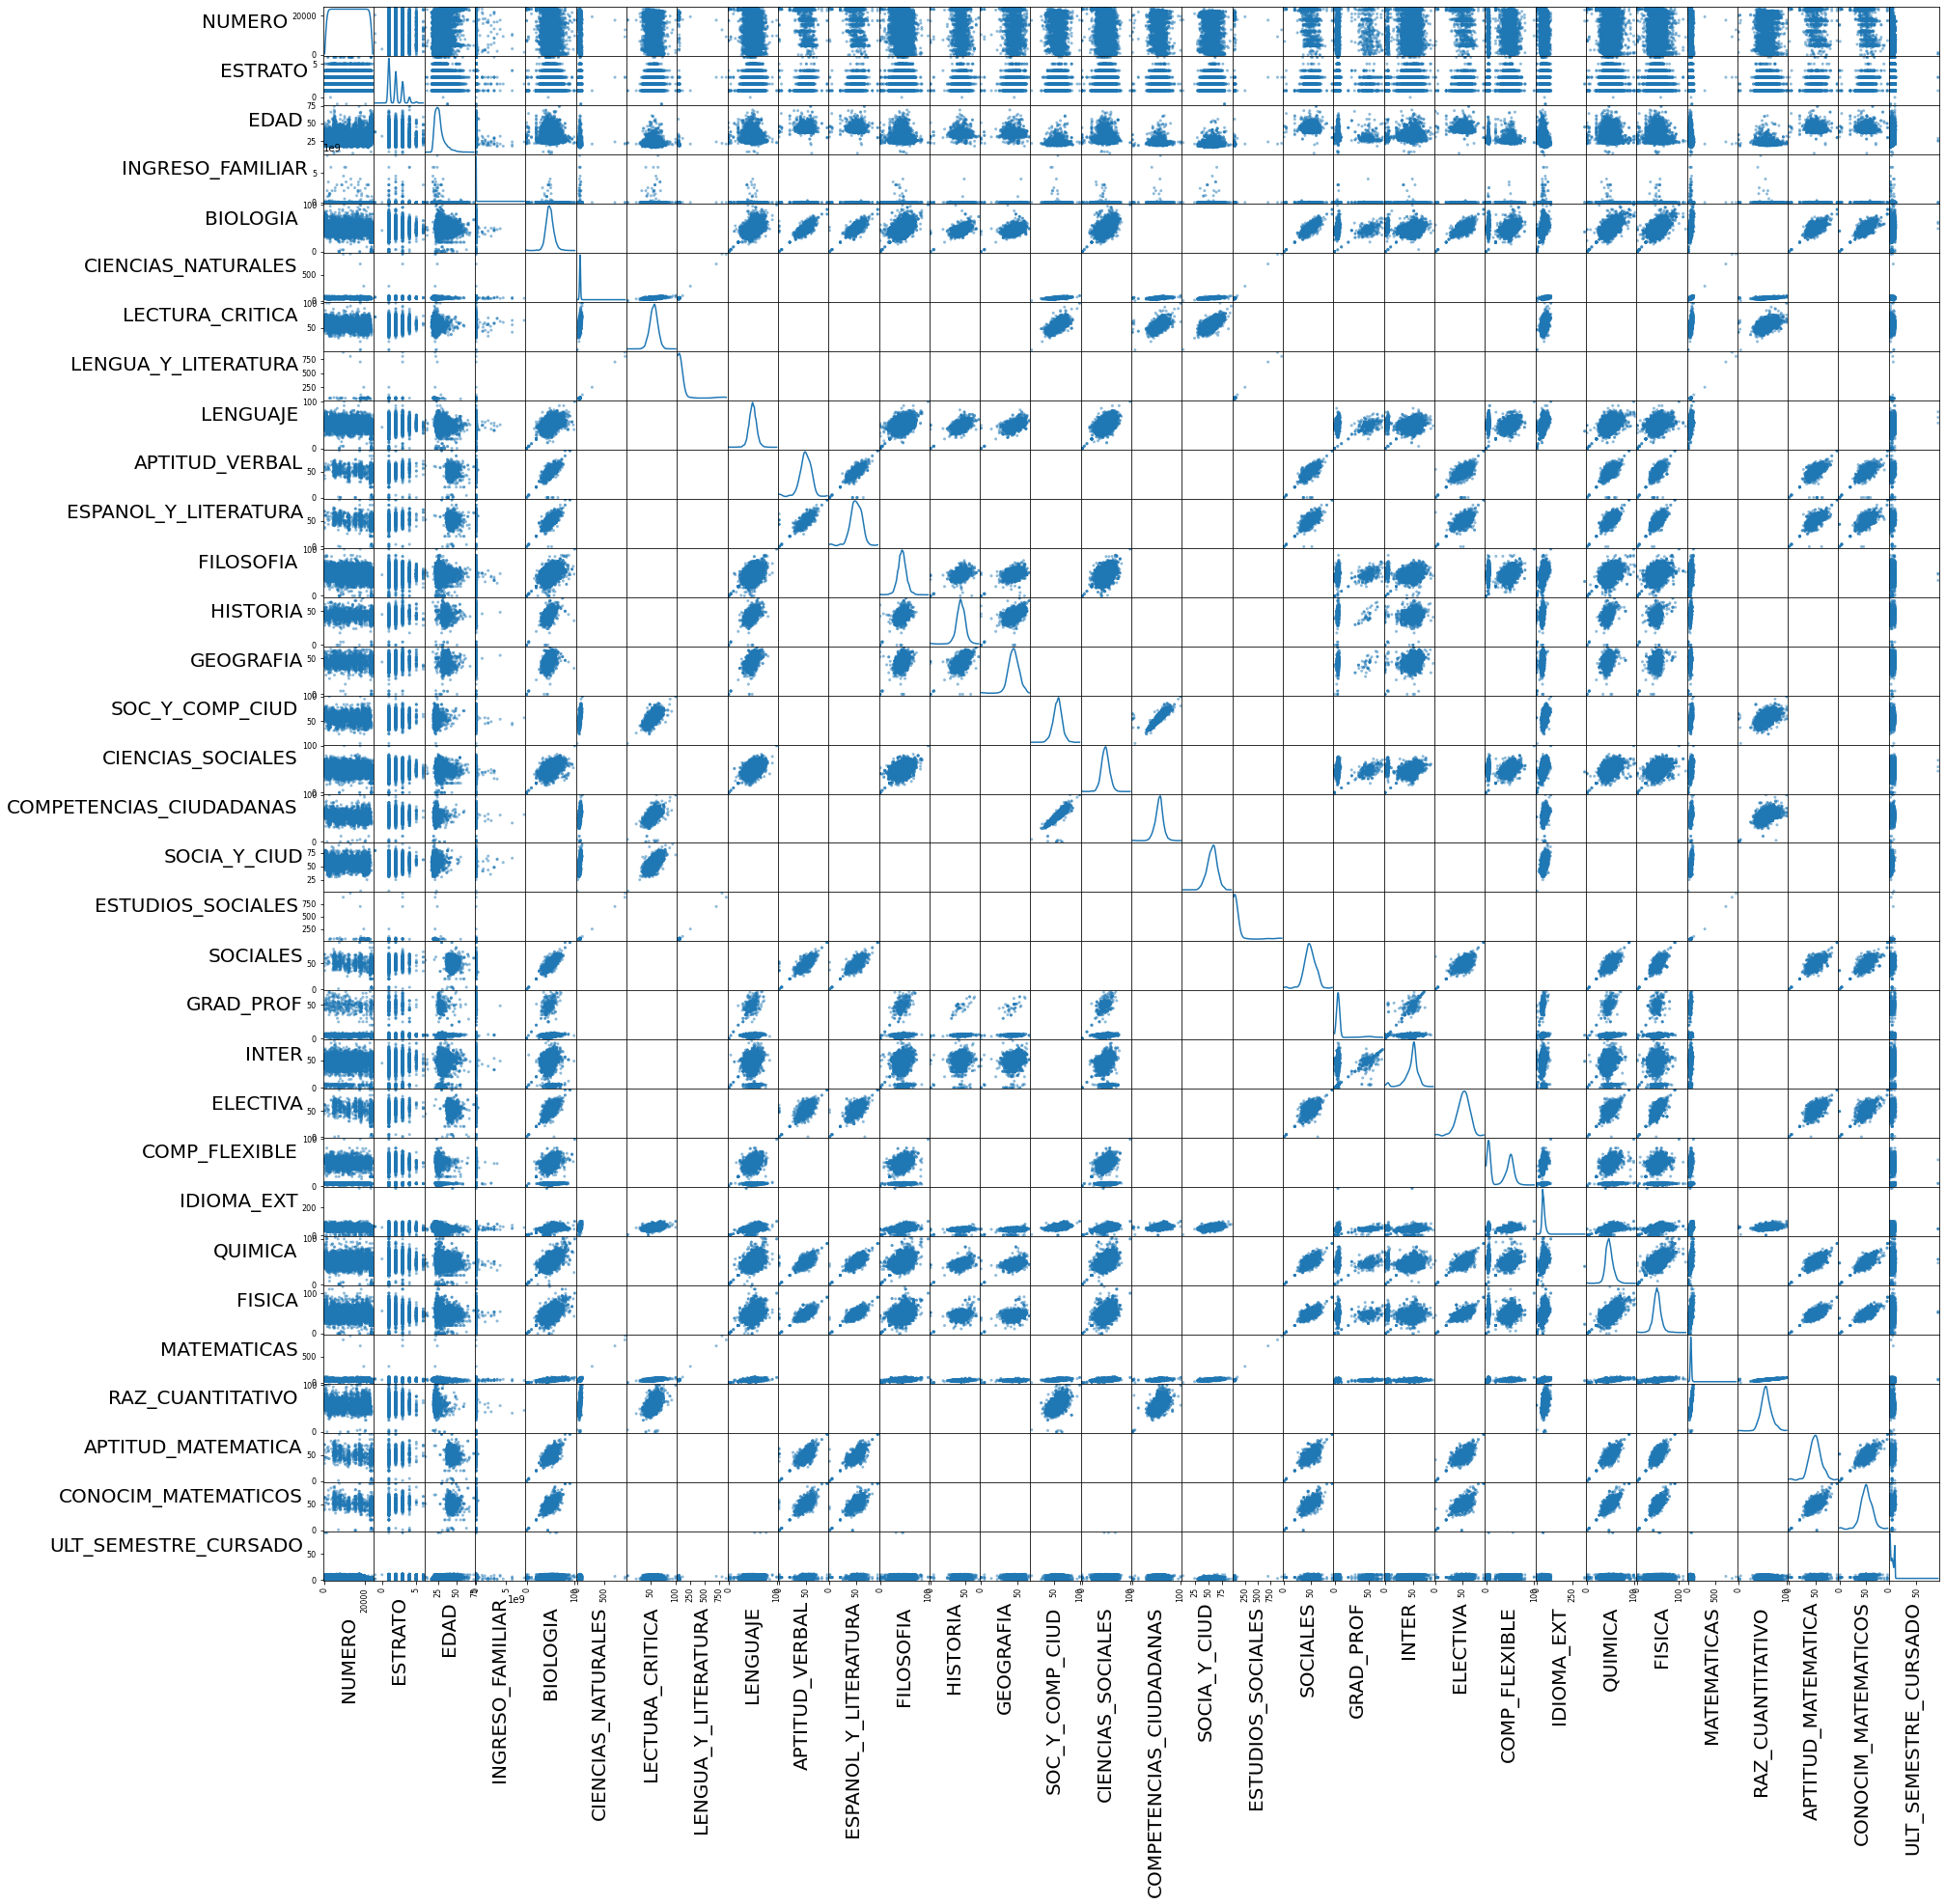

In [12]:
# Scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(
    df_uni,
    figsize  = [30, 30],
    # marker   = ".",
    # s        = 0.2,
    diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0, ha='right')
    
plt.savefig("scatter_matrix_pandas.jpg")

From the Scatter Matrix the following information can be extracted:
* NUMERO is not usable as predictive variable, since the values are dispersed (see histogram curve). It is an ID value.
* ESTRATO is actually a categorical parameter, with values from -1 to 6.
* ULT_SEMESTRE_CURSADO, MATEMATICAS, IDIOMA_EXT, ESTUDIOS_SOCIALES, LENGUA_Y_LITERATURA and CIENCIAS_NATURALES, have Outliers located at very high values that do not seem to make sense, pushing the histogram to the left.

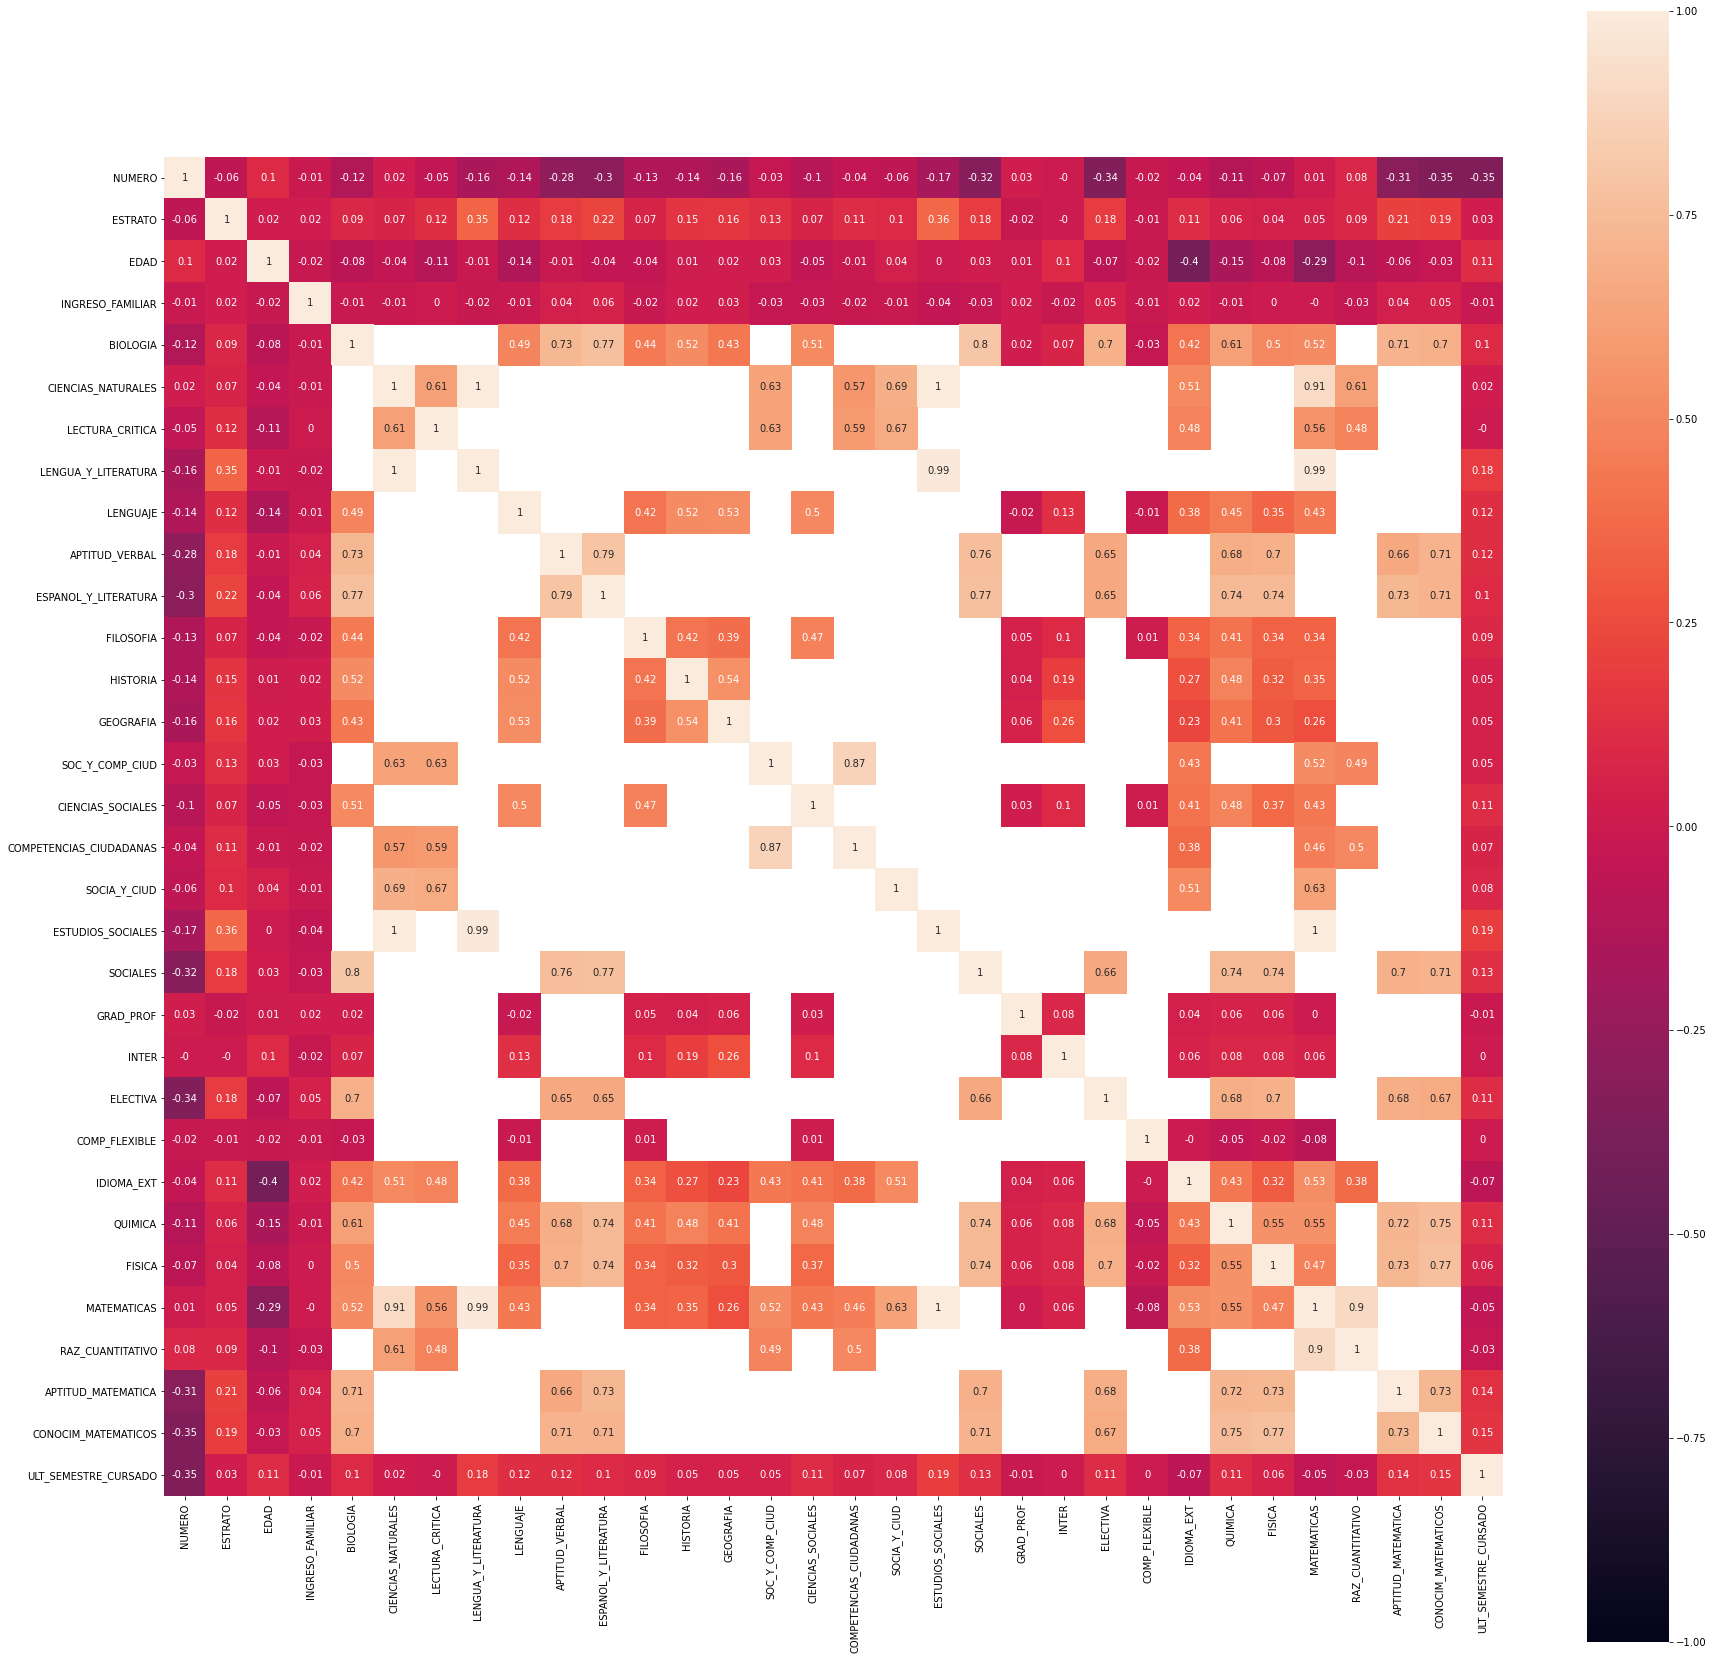

In [8]:
# Correlation matrix
corrMatrix = df_uni.corr()

plt.rcParams['figure.figsize'] = 30, 30
data = np.round(corrMatrix, 2)
sb.heatmap(data, annot = True, vmin=-1, vmax=1, square=True) 
plt.savefig('correlation_matrix_seaborn.pdf') 

From the Correlation Matrix the following information can be extracted:
* Inverse correlations have generally low value. They are not relevant.
* CIENCIAS_NATURALES, LENGUA_Y_LITERATURA, ESTUDIOS_SOCIALES and MATEMATICAS have very high correlation values in some cases. It seems to be affected by null rows and the outliers with high values.

# 2.- Categorical data statistics and analysis

In [33]:
# Split of Numeric columns and Categorical columns
cols = df_uni.columns 

# Lists of column names
num_cols =  df_uni._get_numeric_data().columns 
cat_cols = list(set(cols) - set(num_cols))

# dataframes
df_cat = df_uni.drop(num_cols, axis='columns')
df_num = df_uni.drop(cat_cols, axis='columns')

In [38]:
for i in df_cat:
    print("----" + i + "----")
    print(df_cat[i].value_counts())
    print("")

----FACULTAD----
FACULTAD CIENCIAS DE LA SALUD                                5828
FACULTAD DE HUMANIDADES Y CIENCIAS SOCIALES                  5293
FACULTAD DE INGENIERÍA                                       5100
FACULTAD CIENCIAS CONTABLES, ECONÓMICAS Y ADMINISTRATIVAS    4734
FACULTAD DE EDUCACIÓN                                        2391
FACULTAD DE POSTGRADOS Y RELACIONES INTERNACIONALES           421
CENTRO DE INVESTIGACIONES Y PUBLICACIONES                      53
UNIDAD DE PROYECCION SOCIAL                                    51
UNIDAD DE EDUCACION VIRTUAL                                    38
VICERRECTORIA DE BIENESTAR UNIVERSITARIO                        8
VICERRECTORIA ACADEMICA                                         3
FACULTAD EDUCACION VIRTUAL                                      1
Name: FACULTAD, dtype: int64

----PROGRAMA----
DERECHO                                     2434
CONTADURÍA PÚBLICA                          1887
ENFERMERÍA                                  12

In [39]:
df_cat.describe()

,FACULTAD,PROGRAMA,NOM_ICFES,PAIS_NACIMIENTO,CIUDAD_RESIDENCIA,ESTADO_CIVIL,DEPARTAMENTO,NOMBRE_MPI,PROGRAMA_DESEADO,NIVEL_PADRE,NIVEL_MADRE,ULTIMA_MATRICULA,PRIMERA_MATRICULA
count,23921,23921,23921,23921,23921,23921,23921,23921,23289,23921,23921,19670,19670
unique,12,152,9,1,205,7,30,358,5,6,6,1870,1674
top,FACULTAD CIENCIAS DE LA SALUD,DERECHO,EXAMEN DESPUES DE ABRIL DEL 2010,COLOMBIA,PASTO,Soltero,NARIÑO,PASTO,NO ESPECIFICA,BASICA PRIMARIA,BASICA PRIMARIA,22/07/19,07/02/19
freq,5828,2434,7477,23921,19834,21332,20637,13224,22869,8990,8029,436,275


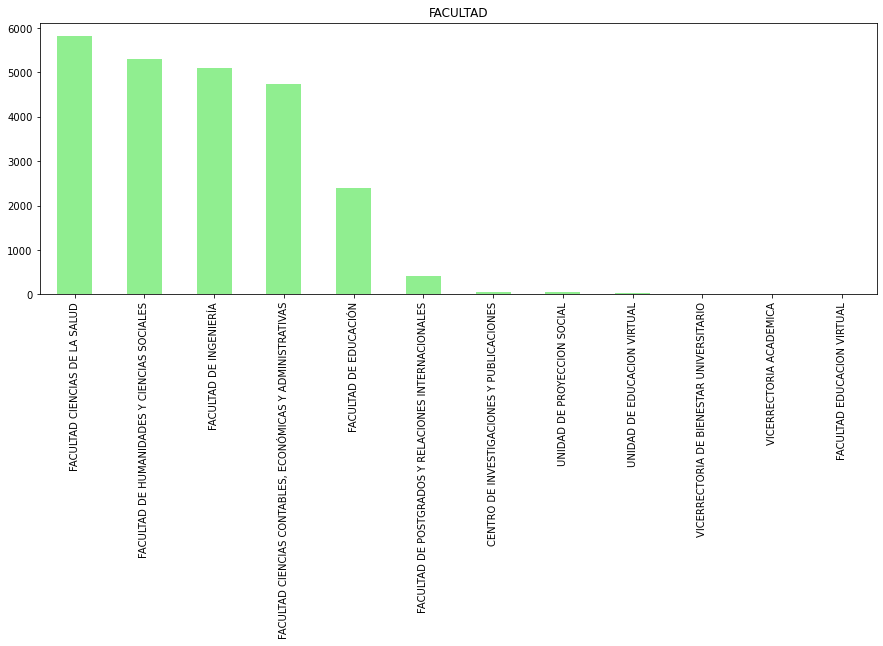

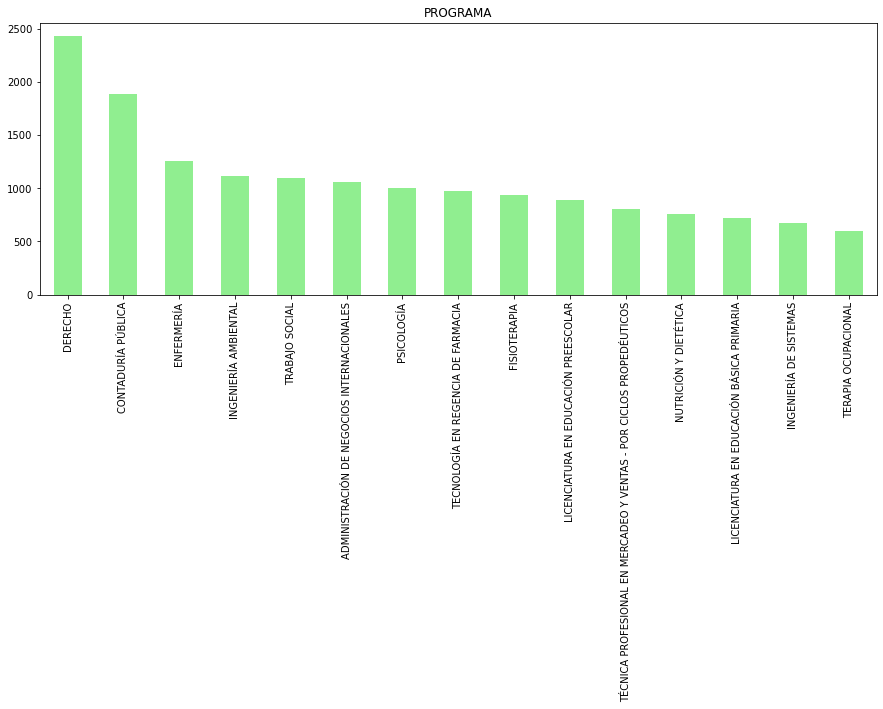

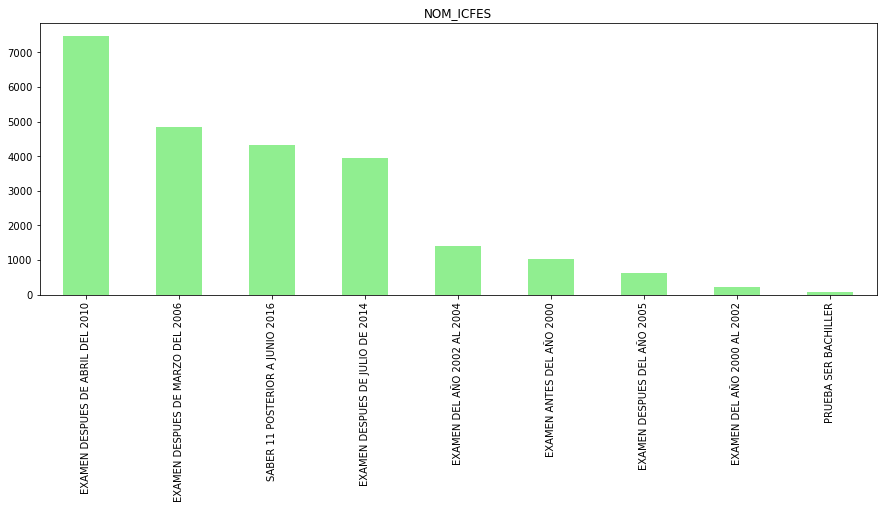

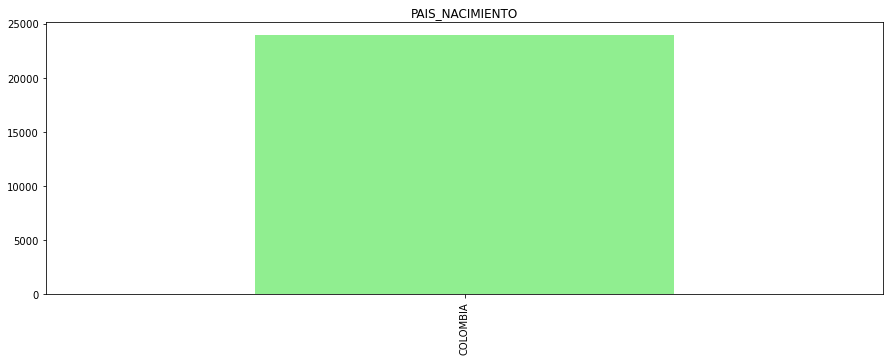

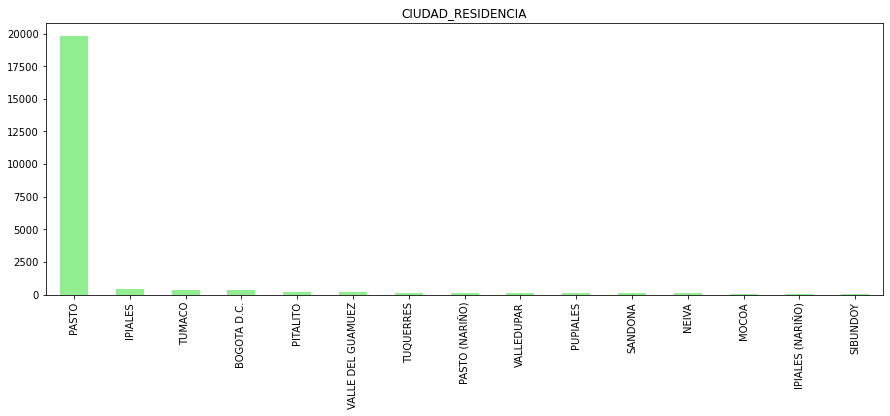

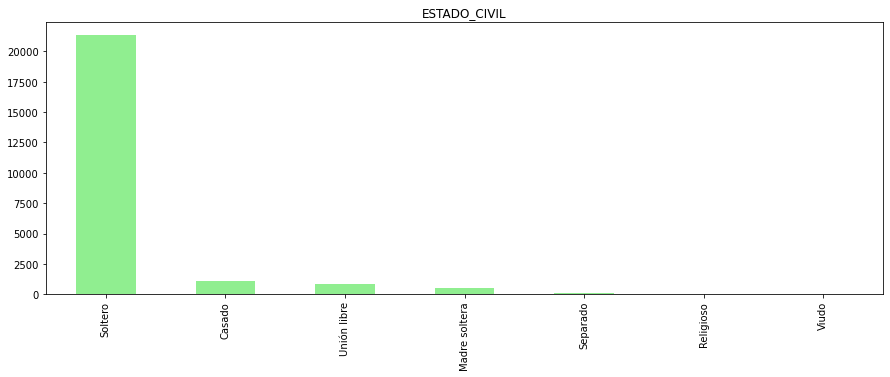

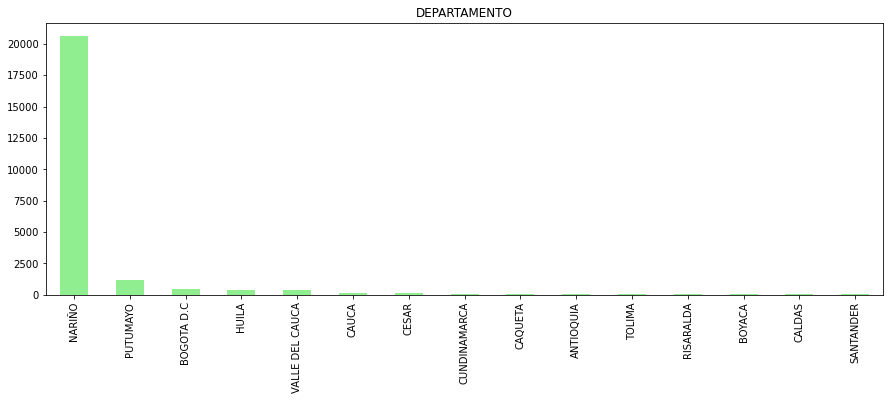

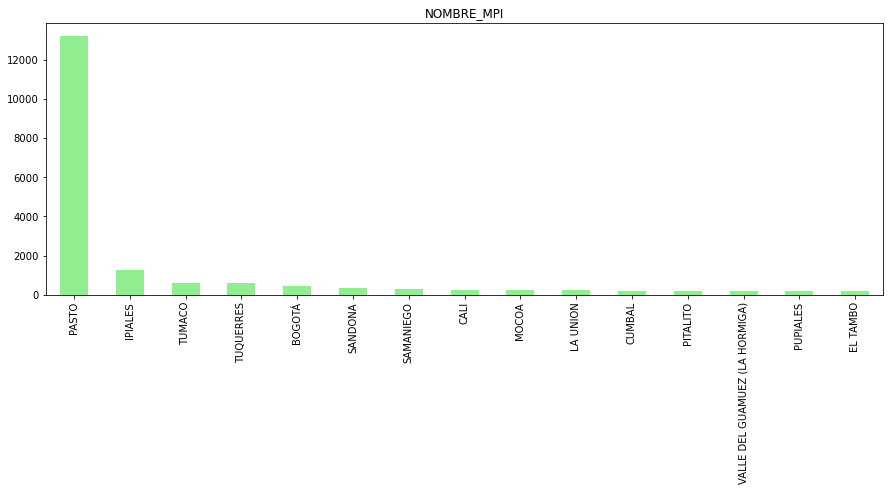

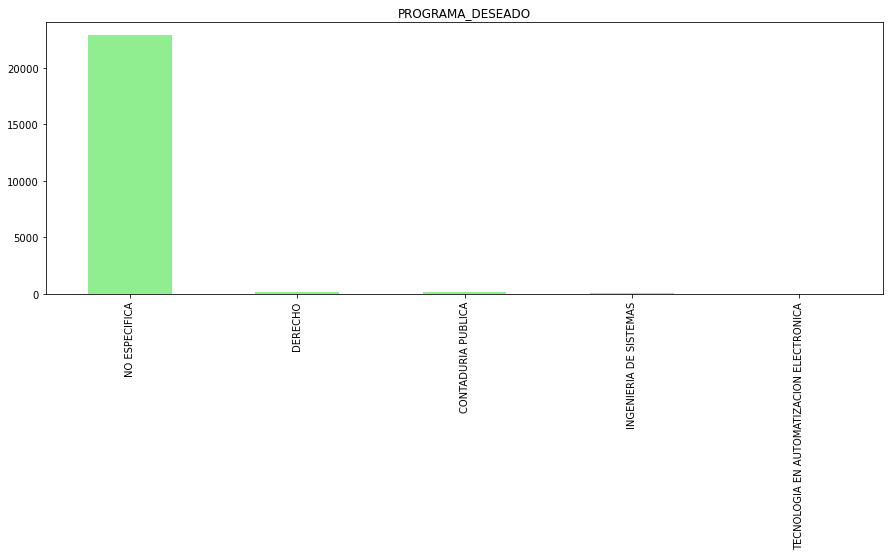

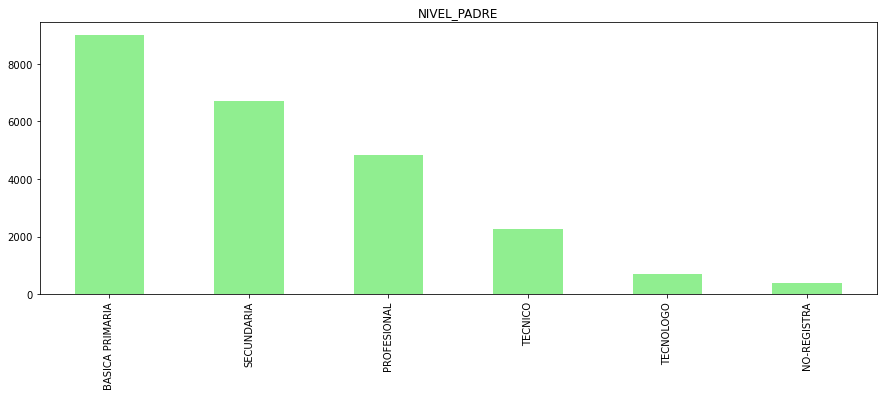

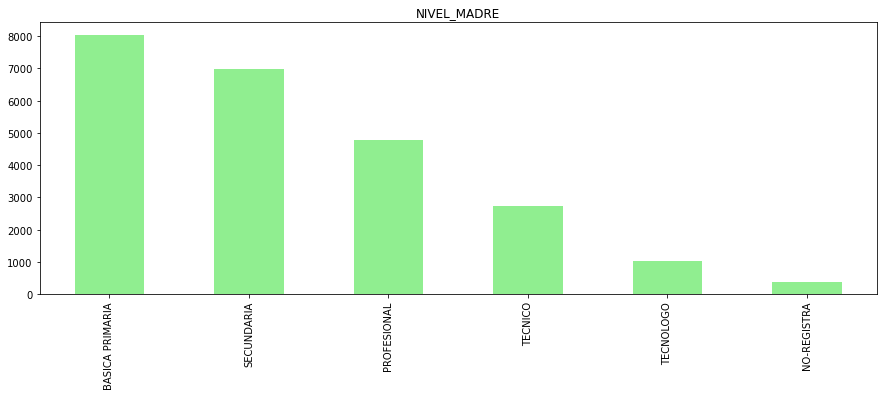

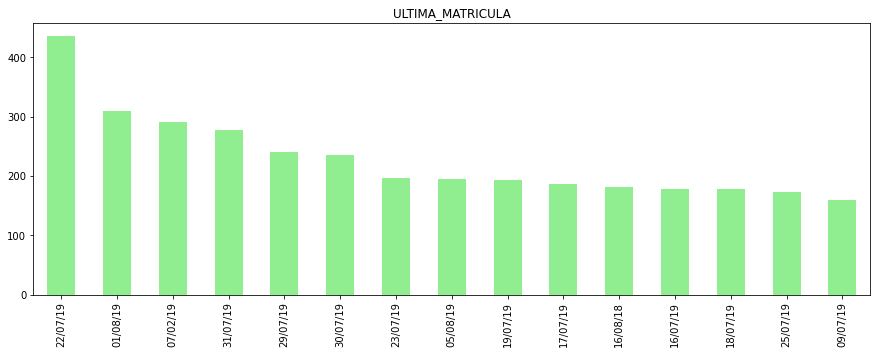

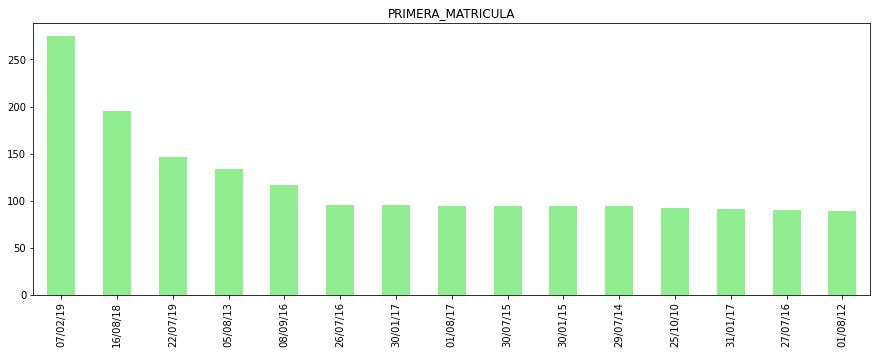

In [43]:
plt.rcParams['figure.figsize'] = [15, 5]
for i in df_cat:
        plt.figure()
        df_cat[i].value_counts()[:15].plot(kind='bar', color='lightgreen')
        plt.title(i)
        plt.show()

From the Categorical frequency analysis the following information can be extracted:
* 4 main disciplines are selected by the students.
* All the students are from Columbia, and most of them live in Pasto, Nariño.
* Most of the students are single and their parents had basic education.